In [27]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
import pickle

In [28]:
df=pd.read_csv("Nutrients_Updated.csv")
df.head()

,Food,Grams,Protein,Fat,Carbs,Healthiness_Score
0,Cows' milk,100,3.278689,4.098361,4.918033,1.639344
1,Milk skim,100,3.658537,0.000000,5.284553,4.065041
2,Buttermilk,100,3.658537,2.032520,5.284553,3.048780
3,"Evaporated, undiluted",100,6.349206,7.936508,9.523810,3.174603
4,Fortified milk,100,6.272023,2.959831,8.386187,5.320648


In [29]:
df.isnull().sum()

Food                 0
Grams                0
Protein              0
Fat                  0
Carbs                0
Healthiness_Score    0
dtype: int64

In [30]:
X=df.drop(columns=["Healthiness_Score","Food"],axis=1)
Y=df["Healthiness_Score"]

In [31]:
print(X)

     Grams   Protein       Fat      Carbs
0      100  3.278689  4.098361   4.918033
1      100  3.658537  0.000000   5.284553
2      100  3.658537  2.032520   5.284553
3      100  6.349206  7.936508   9.523810
4      100  6.272023  2.959831   8.386187
..     ...       ...       ...        ...
329    100  0.000000  0.000000  12.138728
330    100  0.000000  0.000000   8.092486
331    100  0.000000  0.000000  10.115607
332    100  0.000000  0.000000   0.434783
333    100  0.000000  0.000000   0.434783

[334 rows x 4 columns]


In [32]:
scaler=StandardScaler()
std_x=scaler.fit_transform(X)

In [33]:
X_train,X_test,Y_train,Y_test=train_test_split(std_x,Y,test_size=0.2,random_state=3)

In [34]:
reg=LinearRegression()
reg.fit(X_train,Y_train)
predict=reg.predict(X_train)

In [35]:
reg.score(X_train,Y_train)

1.0

Text(0, 0.5, 'actual score')

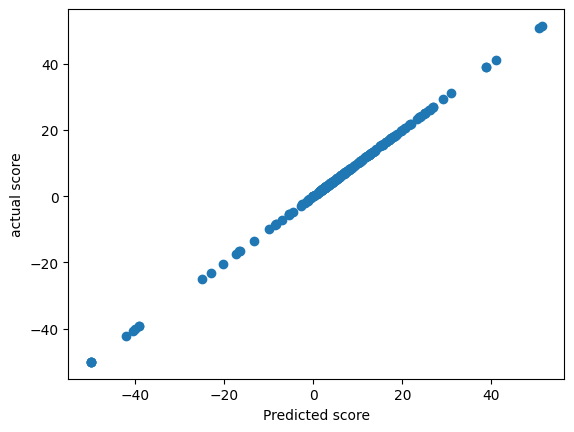

In [36]:
plt.scatter(predict,Y_train)
plt.xlabel("Predicted score")
plt.ylabel("actual score")

In [37]:
input=(100,3.65,2.03,5.28)
input_as_array=np.asarray(input)
input_reshaped=input_as_array.reshape(1,-1)
std_input=scaler.transform(input_reshaped)
prediction=reg.predict(std_input)
print(prediction)

[3.0425]


c:\Users\anipr\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [38]:
pickle.dump(reg,open("model.pkl","wb"))
pickle.dump(scaler, open('scaler.pkl', 'wb'))